In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
from sqlalchemy import Column, Integer, Float, Date, String, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.orm import Session
from sqlalchemy import Index
from sqlalchemy import MetaData
from sqlalchemy import Table
import csv

In [4]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy import func

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
inspector = inspect(engine) 
inspector.get_table_names()

['measurement', 'station']

# Exploratory Climate Analysis

In [10]:
# query the values
results = session.query(Measurement.tobs).all()

# convert tuples to normal list
tobs_values = list(np.ravel(results))
tobs_values

[65.0,
 63.0,
 74.0,
 76.0,
 73.0,
 70.0,
 64.0,
 68.0,
 73.0,
 64.0,
 61.0,
 66.0,
 65.0,
 68.0,
 64.0,
 72.0,
 66.0,
 66.0,
 69.0,
 67.0,
 67.0,
 71.0,
 67.0,
 76.0,
 68.0,
 72.0,
 70.0,
 67.0,
 66.0,
 67.0,
 69.0,
 67.0,
 67.0,
 64.0,
 69.0,
 73.0,
 73.0,
 69.0,
 69.0,
 69.0,
 71.0,
 61.0,
 69.0,
 63.0,
 64.0,
 65.0,
 67.0,
 68.0,
 65.0,
 76.0,
 75.0,
 66.0,
 70.0,
 72.0,
 73.0,
 70.0,
 71.0,
 72.0,
 72.0,
 69.0,
 70.0,
 73.0,
 72.0,
 73.0,
 70.0,
 71.0,
 68.0,
 70.0,
 72.0,
 69.0,
 68.0,
 74.0,
 72.0,
 72.0,
 73.0,
 74.0,
 73.0,
 73.0,
 74.0,
 74.0,
 74.0,
 71.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 73.0,
 73.0,
 71.0,
 71.0,
 68.0,
 70.0,
 71.0,
 74.0,
 71.0,
 75.0,
 76.0,
 75.0,
 75.0,
 76.0,
 76.0,
 76.0,
 77.0,
 77.0,
 73.0,
 74.0,
 76.0,
 76.0,
 80.0,
 74.0,
 77.0,
 77.0,
 76.0,
 77.0,
 78.0,
 78.0,
 75.0,
 73.0,
 77.0,
 76.0,
 77.0,
 77.0,
 78.0,
 75.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 77.0,
 77.0,
 77.0,
 78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,

In [11]:
# query the last 12 months
last_12_months_prec = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()

In [12]:
# convert to dataframe and drop null rows
df_last12months_prec = pd.DataFrame(data=last_12_months_prec)
# df_last12months_prec=df_last12months_prec.dropna()

In [13]:
df_last12months_prec.head(40)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [14]:
df_last12months_prec = df_last12months_prec.set_index("date")
df_last12months_prec.head(20)

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


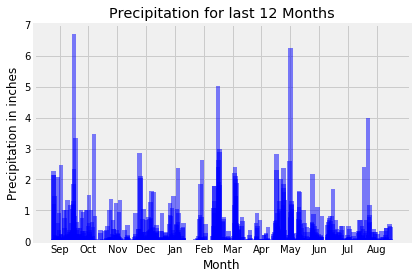

In [15]:
# plotting the data and setting axis labels, months for x
plt.title("Precipitation for last 12 Months")
plt.xlabel("Month")
plt.ylabel("Precipitation in inches")

# Define months for x-ticks labels
months = ["Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]

# Define X and Y values
y = df_last12months_prec["prcp"].tolist()
x = np.arange(0, len(df_last12months_prec.index.tolist()), 1)

month_total = len(y)
month_step_xticks = int((month_total / 12)*1.03)
plt.ylim = max(y) + 1
tick_locations = [x+55 for x in range(1, month_total, month_step_xticks)]

plt.bar(x, y, width=30, color="blue", alpha=0.5, align="edge")
plt.xticks(tick_locations, months)
plt.show()

![precipitation](Images/precipitation.png)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_last12months_prec.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
total_number_of_stations = session.query(Measurement.station).distinct(Measurement.station).count()
print("Total number of stations is "+ str(total_number_of_stations))

Total number of stations is 9


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
Desc_active_stations = session.query(Measurement.station, func.count(Measurement.prcp)).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
Desc_active_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
Most_active_stations = session.query(Measurement.station).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).limit(1).scalar()
print ( "Station which has the highest number of observations is  " + str(Most_active_stations))

Station which has the highest number of observations is  USC00519281


In [20]:
tobs_results = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()
tobs_results

[('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 77.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 77.0),
 ('USC00519397', 80.0),
 ('USC00519397', 76.0),
 ('USC00519397', 77.0),
 ('USC00519397', 81.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 76.0),
 ('USC00519397', 76.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 78.0),
 ('USC00519397',

In [22]:
# most active stations
active = session.query(Measurement.station, func.count(Measurement.station).label('count')).\
            group_by(Measurement.station).\
            order_by('count DESC').all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
Most_active_stations_tobs_results = session.query(Measurement.station, Measurement.tobs).\
                                   filter(Measurement.date.between('2016-08-01', '2017-08-01')).\
                                   filter(Measurement.station == Most_active_stations).all()
Most_active_stations_tobs_results

[('USC00519281', 76.0),
 ('USC00519281', 76.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 81.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 82.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 75.0),
 ('USC00519281', 74.0),
 ('USC00519281', 82.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 81.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281',

In [26]:
# querying the data and last 12 months and filtering the stations with highest activity 
temp = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
session.query(*temp).filter(Measurement.station==Most_active_stations).all()

[(54.0, 85.0, 71.66378066378067)]

In [27]:
Most_active_stations_temp = [result[1] for result in Most_active_stations_tobs_results[0:]]

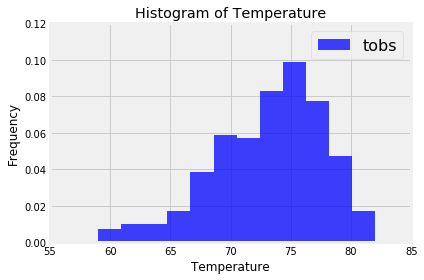

In [28]:
# plot active station temp, bins =12
plt.hist(Most_active_stations_temp, bins = 12, align='mid', label="tobs", alpha=0.75, normed=1,color="b")
plt.title('Last Year Temperature at Station USC00519281')
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.axis([55, 85, 0, 0.12])
plt.title('Histogram of Temperature')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.show()

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_arrive = dt.date(2018, 4, 1)
trip_leave = dt.date(2018, 4, 15)
last_year = dt.timedelta(days=365)
temp_avg_lst_year = (calc_temps((trip_arrive-last_year), (trip_leave-last_year)))
print(temp_avg_lst_year)

[(67.0, 74.47368421052632, 82.0)]


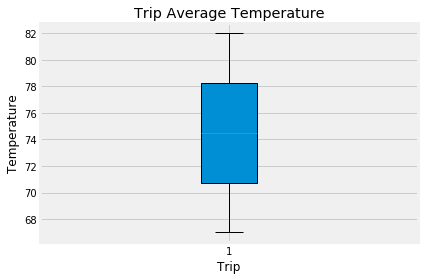

In [31]:
# plotting data as boxplot
fig, ax = plt.subplots()
x = range(len(temp_avg_lst_year))
ax.boxplot(temp_avg_lst_year, patch_artist=True)
ax.set_title('Trip Average Temperature')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

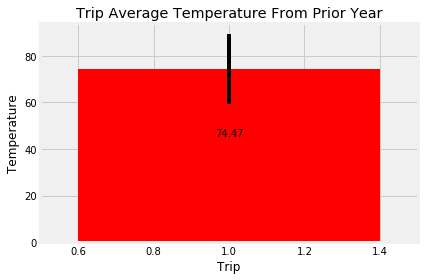

In [69]:
# plotting the calculated min/max/avg from last year for the trip dates as a bar chart
p2p = temp_avg_lst_year[0][2]-temp_avg_lst_year[0][0]
avgtemp = temp_avg_lst_year[0][1]
min_temp = temp_avg_lst_year[0][0]
max_temp = temp_avg_lst_year[0][2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , avgtemp, color= 'red', yerr=p2p)
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature")
ax.set_title("Trip Average Temperature From Prior Year")

def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)
        
        
# labels 
autolabels(bar_chart)
plt.xlim(.5,1.5)
fig.tight_layout()
plt.show()

In [61]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
search_sd = trip_leave
most_recent_date = session.query(Measurement.date)\
    .order_by(Measurement.date.desc()).first() 
most_recent_date = most_recent_date[0]
search_ed = calc_temps(trip_arrive, trip_leave)
q = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= search_sd)\
.filter(Measurement.date <= search_ed)\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())
for row in q:
    rain ="{0:.2f}".format(row[1])
    print(f"Station:  {row[0]}\n    Rainfall:  {rain}  \n    Location:  {row[2]}\n    Elevation:  {row[3]}  \
    Latitude:  {row[4]}  Longitude:  {row[5]}")

InterfaceError: (sqlite3.InterfaceError) Error binding parameter 1 - probably unsupported type. [SQL: 'SELECT station.station AS station_station, sum(measurement.prcp) AS sum_1, station.name AS station_name, station.elevation AS station_elevation, station.latitude AS station_latitude, station.longitude AS station_longitude \nFROM station, measurement \nWHERE measurement.station = station.station AND measurement.date >= ? AND measurement.date <= ? GROUP BY station.station ORDER BY sum(measurement.prcp) DESC'] [parameters: ('2018-04-15', [(None, None, None)])] (Background on this error at: http://sqlalche.me/e/rvf5)

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
